In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
诶呦我真的跑不了<-read_csv("data/chr_testing.csv")
split<-initial_split(诶呦我真的跑不了,prop=0.7,strata=label)


Rows: 650 Columns: 785
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): label
dbl (784): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [18]:
set.seed(2023)
split1<-initial_split(诶呦我真的跑不了,prop=0.8,strata=label)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [19]:
set.seed(2023)
testing<-training(split)
split1<-initial_split(testing,prop=0.7,strata=label)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [20]:
chr_training<-training(split1)|>
                mutate(label=as.factor(label))
chr_testing<-testing(split1)|>
                mutate(label=as.factor(label))

In [7]:
#我跑不了你们跑吧<-read_csv("data/chr_training.csv")

In [21]:
#Step1 Models
best_k<-3
chr_model1<-nearest_neighbor(weight_func="rectangular",neighbors=best_k)|>
            set_engine("kknn")|>
            set_mode("classification")

#Step2 Recipe (scaling and centering are not necessary for this data frame)
chr_recipe1<-recipe(label~.,data = chr_training)

#Step3 Workflow
chr_wf1<-workflow()|>
        add_recipe(chr_recipe1)|>
        add_model(chr_model1)


In [22]:
#Step4 Fitting
chr_fit1<-chr_wf1|>
          fit(data=chr_training)

In [27]:
#Step5 Predict
pred1<-predict(chr_fit1,chr_testing)|>
        bind_cols(chr_testing)|>
        metrics(truth = label,estimate = .pred_class)|>
        filter(.metric=="accuracy")
pred1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.620438


In [29]:
#Step6 buiding logical regression model
chr_lrm1<-glm(label ~., data = chr_training, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”


In [35]:
#Step7 Predicting using logical regression model
pred_test1 <- predict(chr_lrm,chr_testing,type="response")

test_with_prob1<-data.frame(probability=pred_test)|>
                bind_cols(chr_testing)
test_with_prob1

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.220446e-16,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,7.712169e-03,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1.000000e+00,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1.000000e+00,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1.000000e+00,b,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,9.999992e-01,b,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,1.000000e+00,b,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,1.000000e+00,b,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,1.000000e+00,b,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


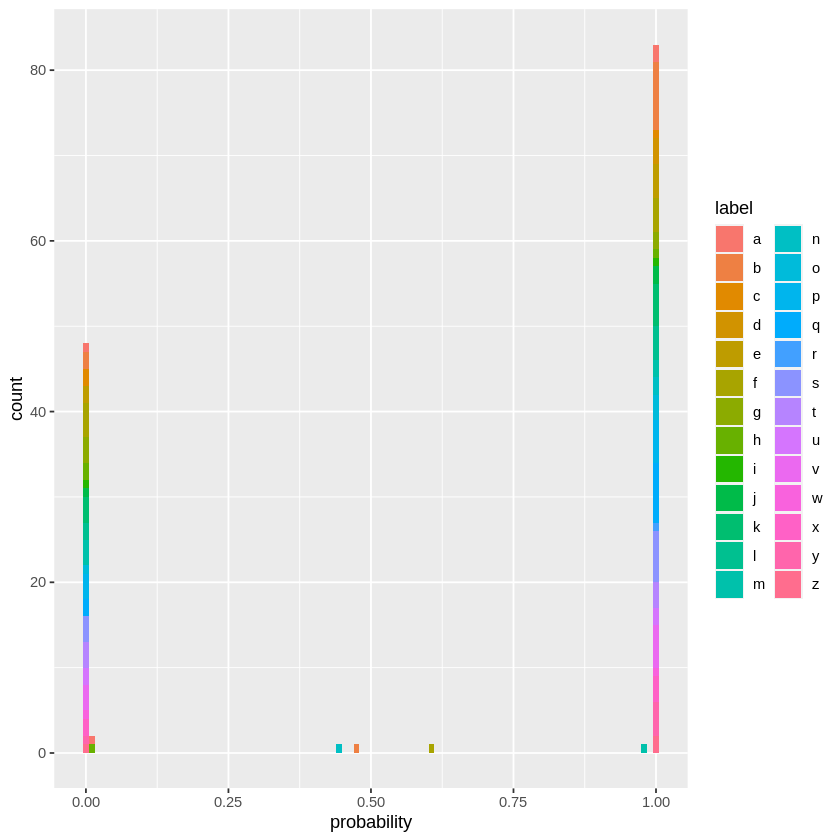

In [42]:
#Step8 Visualizing the frequency distribution of different probabilities
prob_plot1<-ggplot(test_with_prob,aes(x=probability,fill=label))+
                geom_histogram(binwidth = 0.001)+
                stat_bin(bins=100)
prob_plot1